# Directing Customers to Subscription Through App Behavior Analysis


# Import essential libraries

In [25]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

# Import dataset & explore

In [26]:
fineTech_appData = pd.read_csv("/content/FineTech_appData.csv")

In [27]:
fineTech_appData.shape

(50000, 12)

In [28]:
fineTech_appData.head(6) # show fisrt 6 rows of fineTech_appData DataFrame  *****code 1

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   
5   56480  2013-04-03 09:58:15.752          2   09:00:00   20   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   
5  idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...          14         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1  
5                     0         1  2013-04-03 09:59:03.291      0

In [29]:
fineTech_appData.tail(6) # show last 6 rows of fineTech_appData DataFrame  *****code 2

user               first_open  dayofweek       hour  age  \
49994   90813  2013-02-25 19:35:12.691          0   19:00:00   36   
49995  222774  2013-05-09 13:46:17.871          3   13:00:00   32   
49996  169179  2013-04-09 00:05:17.823          1   00:00:00   35   
49997  302367  2013-02-20 22:41:51.165          2   22:00:00   39   
49998  324905  2013-04-28 12:33:04.288          6   12:00:00   27   
49999   27047  2012-12-14 01:22:44.638          4   01:00:00   25   

                                             screen_list  numscreens  \
49994  idscreen,joinscreen,Cycle,product_review,produ...          25   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled            enrolled_date  \
49994         0                     0         1  2013-02-25 19:36:56.082   
49995         0                     0         1  2013-05-09 13:47:52.875   
49996         0                     1         0                      NaN   
49997         0                     0         0                      NaN   
49998         0                     0         1  2013-04-28 12:35:38.709   
49999         0                     0         0                      NaN   

       liked  
49994      0  
49995      0  
49996      0  
49997      0  
49998      0  
49999      1

In [30]:
for i in [1,2,3,4,5]:
    print(fineTech_appData.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [31]:
fineTech_appData.isnull().sum() # take summation of null values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [32]:
fineTech_appData.info() # brief inforamtion about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [33]:
fineTech_appData.describe() # give the distribution of numerical variables  *****code 3

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

In [34]:
# Get the unique value of each columns and it's length
features = fineTech_appData.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52 

In [35]:
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [36]:
#  hour data convert string to int
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int)

In [37]:
# get data type of each columns
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [38]:
fineTech_appData.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [39]:
# drop object dtype columns
fineTech_appData2 = fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [40]:
fineTech_appData2.head(6) # head of numeric dataFrame *****code 4

dayofweek  hour  age  numscreens  minigame  used_premium_feature  enrolled  \
0          3     2   23          15         0                     0         0   
1          6     1   24          13         0                     0         0   
2          1    19   23           3         0                     1         0   
3          4    16   28          40         0                     0         1   
4          1    18   31          32         0                     0         1   
5          2     9   20          14         0                     0         1   

   liked  
0      0  
1      0  
2      1  
3      0  
4      1  
5      0

# Data Visualization

## Pairplot of fineTech_appData2

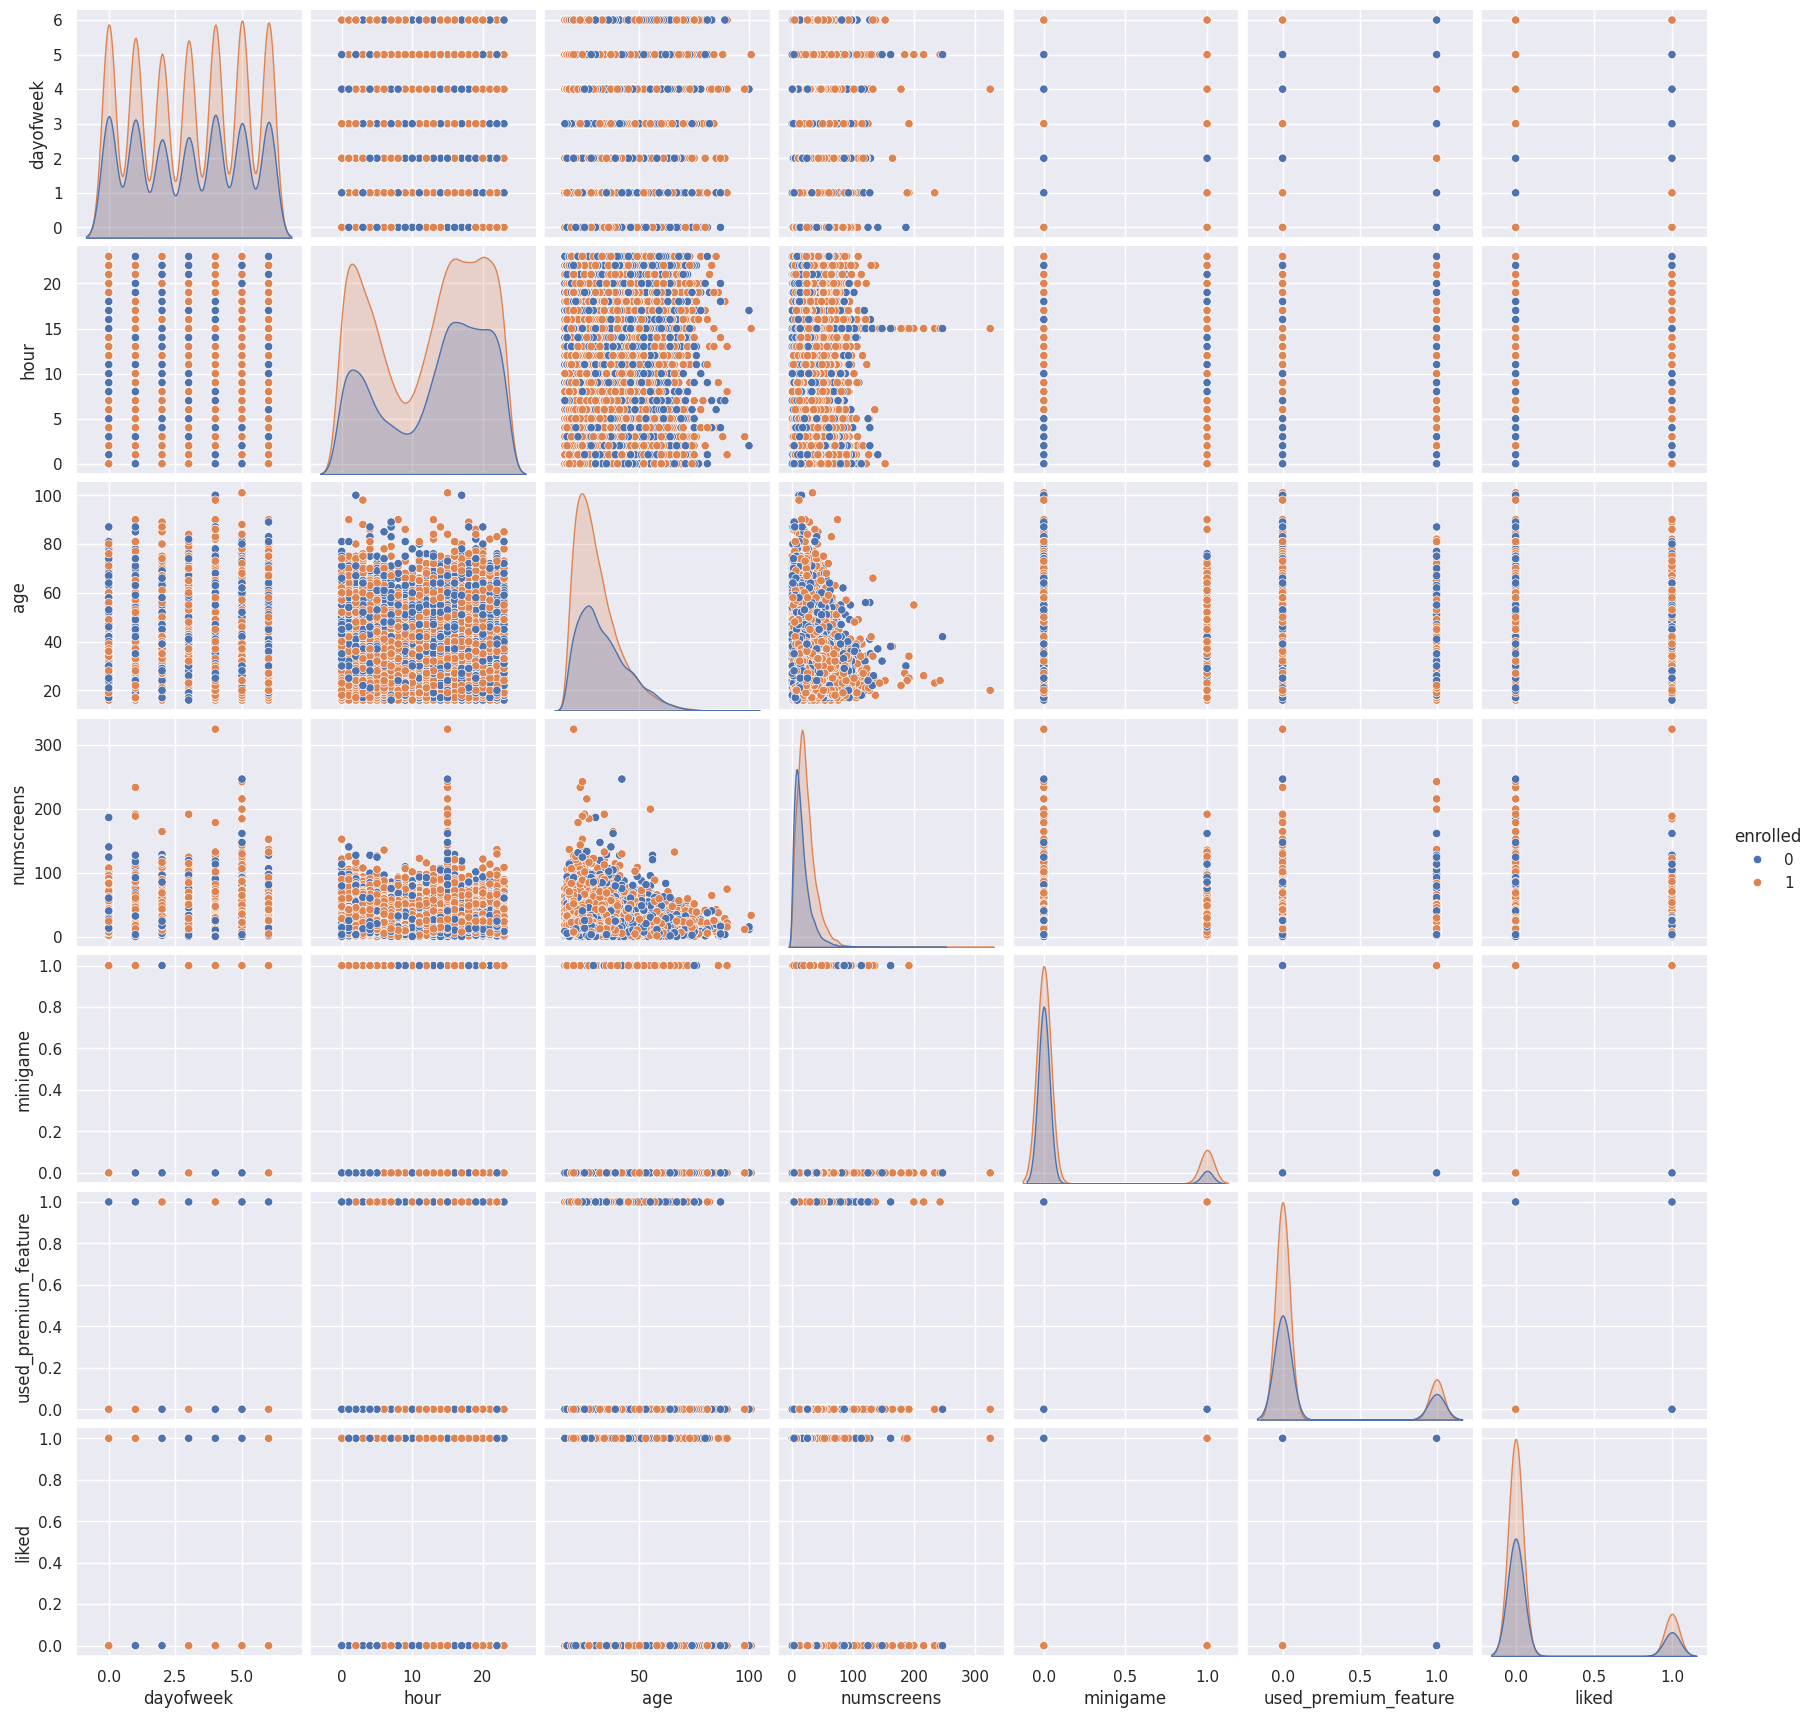

In [ ]:
# Pailplot of fineTech_appData2 Dataset

#%matplotlib qt5 # for show graph in seperate window
sns.pairplot(fineTech_appData2, hue  = 'enrolled') # *****code 6

## Count of enrolled

In [41]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (fineTech_appData.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(fineTech_appData.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


In [42]:
for i,j in enumerate(features):
    print(i,j)

0 user
1 first_open
2 dayofweek
3 hour
4 age
5 screen_list
6 numscreens
7 minigame
8 used_premium_feature
9 enrolled
10 enrolled_date
11 liked


## Correlation barplot with 'enrolled' feature

<ipython-input-43-8a5da6ef6070>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")


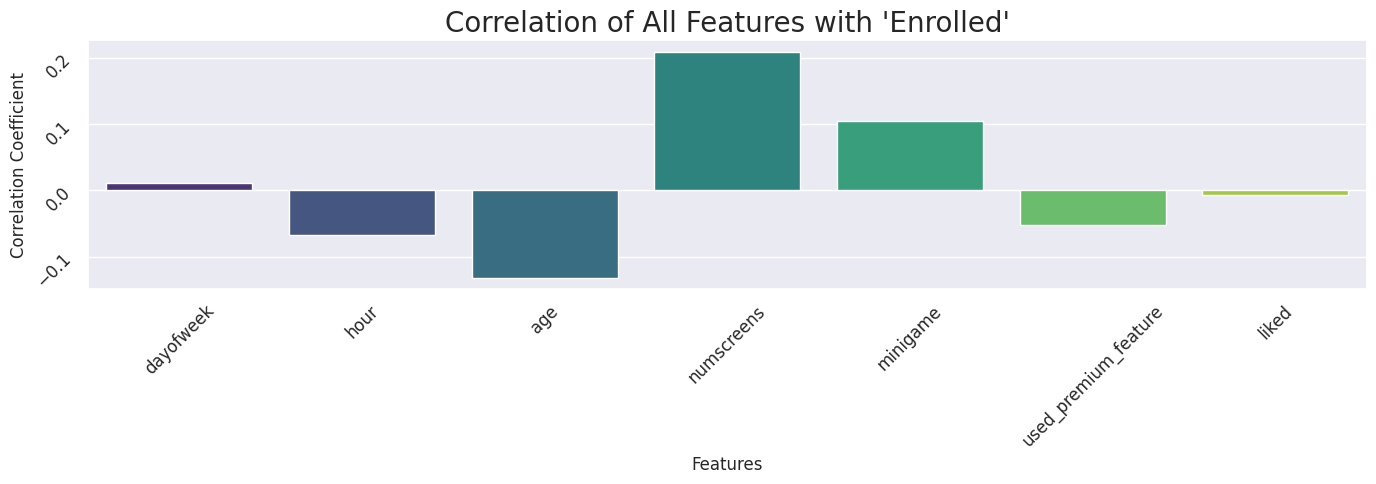

In [43]:
# show corelation barplot
import seaborn as sns
import matplotlib.pyplot as plt

# Set darkgrid style
sns.set(style="darkgrid")

# Drop 'enrolled' from the dataset
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis=1)

# Compute correlations
correlations = fineTech_appData3.corrwith(fineTech_appData2['enrolled'])

# Plot the barplot
plt.figure(figsize=(14, 5))
plt.title("Correlation of All Features with 'Enrolled'", fontsize=20)
ax = sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")

# Beautify tick labels
ax.tick_params(labelsize=12, labelrotation=45, color="k")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


In [44]:
# parsing object data into data time format

fineTech_appData['first_open'] = pd.to_datetime(fineTech_appData['first_open'], errors='coerce')



In [45]:
fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]

In [46]:
fineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [47]:
fineTech_appData['time_to_enrolled'] = (
    fineTech_appData['enrolled_date'] - fineTech_appData['first_open']
).dt.total_seconds() / 3600


(array([2.8195e+04, 1.0320e+03, 5.6600e+02, 4.2600e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0.       ,  543.4686945, 1086.937389 , 1630.4060835,
        2173.874778 , 2717.3434725, 3260.812167 , 3804.2808615,
        4347.749556 , 4891.2182505, 5434.686945 ]),
 <BarContainer object of 10 artists>)

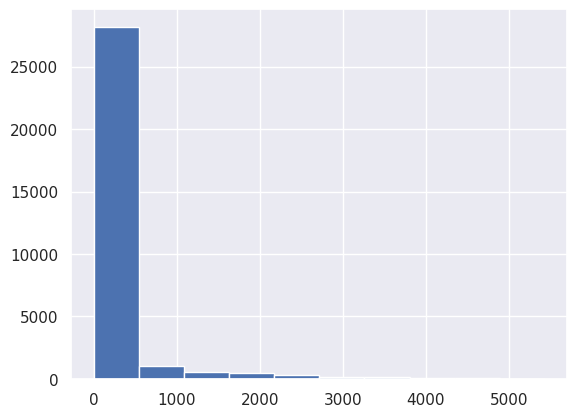

In [48]:
# plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna()) # *****code 10

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   178.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

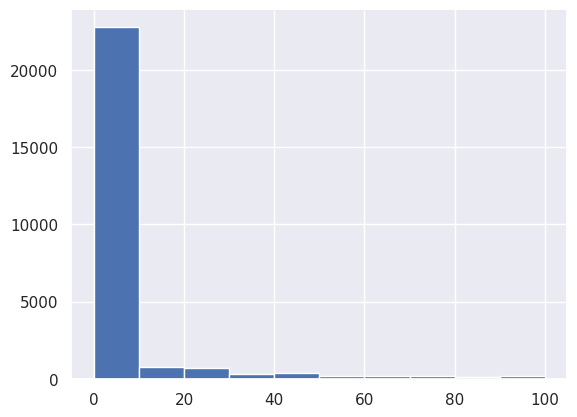

In [49]:
# Plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100)) # *****code 11

In [50]:
# Those customers have enrolled after 48 hours set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0

In [51]:
fineTech_appData

user              first_open  dayofweek  hour  age  \
0      235136 2012-12-27 02:14:51.273          3     2   23   
1      333588 2012-12-02 01:16:00.905          6     1   24   
2      254414 2013-03-19 19:19:09.157          1    19   23   
3      234192 2013-07-05 16:08:46.354          4    16   28   
4       51549 2013-02-26 18:50:48.661          1    18   31   
...       ...                     ...        ...   ...  ...   
49995  222774 2013-05-09 13:46:17.871          3    13   32   
49996  169179 2013-04-09 00:05:17.823          1     0   35   
49997  302367 2013-02-20 22:41:51.165          2    22   39   
49998  324905 2013-04-28 12:33:04.288          6    12   27   
49999   27047 2012-12-14 01:22:44.638          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled           enrolled_date  \
0             0                     0         0                     NaT   
1             0                     0         0                     NaT   
2             0                     1         0                     NaT   
3             0                     0         1 2013-07-05 16:11:49.513   
4             0                     0         1 2013-02-26 18:56:37.841   
...         ...                   ...       ...                     ...   
49995         0                     0         1 2013-05-09 13:47:52.875   
49996         0                     1         0                     NaT   
49997         0                     0         0                     NaT   
49998         0                     0         1 2013-04-28 12:35:38.709   
49999         0                     0         0                     NaT   

       liked  time_to_enrolled  
0          0               NaN  
1          0               NaN  
2          1               NaN  
3          0          0.050877  
4          1          0.096994  
...      ...               ...  
49995      0          0.026390  
49996      0               NaN  
49997      0               NaN  
49998      0          0.042895  
49999      1               NaN  

[50000 rows x 13 columns]

In [52]:
fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [53]:
fineTech_appData

user  dayofweek  hour  age  \
0      235136          3     2   23   
1      333588          6     1   24   
2      254414          1    19   23   
3      234192          4    16   28   
4       51549          1    18   31   
...       ...        ...   ...  ...   
49995  222774          3    13   32   
49996  169179          1     0   35   
49997  302367          2    22   39   
49998  324905          6    12   27   
49999   27047          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled  liked  
0             0                     0         0      0  
1             0                     0         0      0  
2             0                     1         0      1  
3             0                     0         1      0  
4             0                     0         1      1  
...         ...                   ...       ...    ...  
49995         0                     0         1      0  
49996         0                     1         0      0  
49997         0                     0         0      0  
49998         0                     0         1      0  
49999         0                     0         0      1  

[50000 rows x 10 columns]

In [54]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("/content/top_screens.csv").top_screens.values

In [55]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [56]:
type(fineTech_app_screen_Data)

numpy.ndarray

In [57]:
# Add ',' at the end of each string of  'sreen_list' for further operation.
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','

In [58]:
fineTech_appData

user  dayofweek  hour  age  \
0      235136          3     2   23   
1      333588          6     1   24   
2      254414          1    19   23   
3      234192          4    16   28   
4       51549          1    18   31   
...       ...        ...   ...  ...   
49995  222774          3    13   32   
49996  169179          1     0   35   
49997  302367          2    22   39   
49998  324905          6    12   27   
49999   27047          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                     Splash,Cycle,Loan,           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                Cycle,Splash,Home,RewardsContainer,           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled  liked  
0             0                     0         0      0  
1             0                     0         0      0  
2             0                     1         0      1  
3             0                     0         1      0  
4             0                     0         1      1  
...         ...                   ...       ...    ...  
49995         0                     0         1      0  
49996         0                     1         0      0  
49997         0                     0         0      0  
49998         0                     0         1      0  
49999         0                     0         0      1  

[50000 rows x 10 columns]

In [59]:
# string into to number

for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")

In [60]:
# test
fineTech_appData.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int64

In [61]:
# test
fineTech_appData.screen_list.str.replace('Splash'+",", "")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [62]:
# get shape
fineTech_appData.shape

(50000, 68)

In [63]:
# head of DataFrame
fineTech_appData.head(6) # *****code 12

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   
5   56480          2     9   20   

                                         screen_list  numscreens  minigame  \
0  joinscreen,product_review,ScanPreview,VerifyTo...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                                              3         0   
3  product_review,Home,product_review,ReferralCon...          40         0   
4  joinscreen,ScanPreview,VerifySSN,Home,SelectIn...          32         0   
5  Home,ScanPreview,VerifySSN,product_review,prod...          14         0   

   used_premium_feature  enrolled  liked  ...  ProfileJobTitle  Login  \
0                     0         0      0  ...                0      1   
1                     0         0      0  ...                0      0   
2                     1         0      1  ...                0      0   
3                     0         1      0  ...                0      0   
4                     0         1      1  ...                0      0   
5                     0         1      0  ...                0      0   

   ProfileEmploymentLength  WebView  SecurityModal  Loan4  ResendToken  \
0                        0        0              0      0            0   
1                        0        0              0      0            0   
2                        0        0              0      0            0   
3                        0        0              0      0            0   
4                        0        0              0      0            0   
5                        0        0              0      0            0   

   TransactionList  NetworkFailure  ListPicker  
0                0               0           0  
1                0               0           0  
2                0               0           0  
3                0               0           0  
4                0               0           0  
5                0               0           0  

[6 rows x 68 columns]

In [64]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [65]:
fineTech_appData.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [66]:
# count remain screen list and store counted number in 'remain_screen_list'

fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [67]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [68]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  ...  Login  \
0                         0         0      0      1  ...      1   
1                         0         0      0      1  ...      0   
2                         1         0      1      0  ...      0   
3                         0         1      0      0  ...      0   
4                         0         1      1      1  ...      0   
...                     ...       ...    ...    ...  ...    ...   
49995                     0         1      0      0  ...      0   
49996                     1         0      0      0  ...      0   
49997                     0         0      0      0  ...      0   
49998                     0         1      0      0  ...      0   
49999                     0         0      1      1  ...      0   

       ProfileEmploymentLength  WebView  SecurityModal  Loan4  ResendToken  \
0                            0        0              0      0            0   
1                            0        0              0      0            0   
2                            0        0              0      0            0   
3                            0        0              0      0            0   
4                            0        0              0      0            0   
...                        ...      ...            ...    ...          ...   
49995                        0        1              0      0            0   
49996                        0        0              0      0            0   
49997                        0        0              0      0            0   
49998                        0        0              0      0            0   
49999                        0        0              0      0            0   

       TransactionList  NetworkFailure  ListPicker  remain_screen_list  
0                    0               0           0                   7  
1                    0               0           0                   5  
2                    0               0           0                   0  
3                    0               0           0                   6  
4                    0               0           0                  10  
...                ...             ...         ...                 ...  
49995                0               0           0                   6  
49996                0               0           0                   1  
49997                0               0           0                   6  
49998                0               0           0                  13  
49999                0               0           0                   5  

[50000 rows x 68 columns]

In [69]:
# total columns
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [70]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis = 1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

In [71]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  ...  \
0                         0         0      0      1  ...   
1                         0         0      0      1  ...   
2                         1         0      1      0  ...   
3                         0         1      0      0  ...   
4                         0         1      1      1  ...   
...                     ...       ...    ...    ...  ...   
49995                     0         1      0      0  ...   
49996                     1         0      0      0  ...   
49997                     0         0      0      0  ...   
49998                     0         1      0      0  ...   
49999                     0         0      1      1  ...   

       ProfileEmploymentLength  WebView  SecurityModal  Loan4  ResendToken  \
0                            0        0              0      0            0   
1                            0        0              0      0            0   
2                            0        0              0      0            0   
3                            0        0              0      0            0   
4                            0        0              0      0            0   
...                        ...      ...            ...    ...          ...   
49995                        0        1              0      0            0   
49996                        0        0              0      0            0   
49997                        0        0              0      0            0   
49998                        0        0              0      0            0   
49999                        0        0              0      0            0   

       TransactionList  NetworkFailure  ListPicker  remain_screen_list  \
0                    0               0           0                   7   
1                    0               0           0                   5   
2                    0               0           0                   0   
3                    0               0           0                   6   
4                    0               0           0                  10   
...                ...             ...         ...                 ...   
49995                0               0           0                   6   
49996                0               0           0                   1   
49997                0               0           0                   6   
49998                0               0           0                  13   
49999                0               0           0                   5   

       saving_screens_count  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
49995                     0  
49996                     0  
49997                     0  
49998                     0  
49999                     7  

[50000 rows x 59 columns]

In [72]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [73]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  ...  WebView  \
0                         0         0      0      1  ...        0   
1                         0         0      0      1  ...        0   
2                         1         0      1      0  ...        0   
3                         0         1      0      0  ...        0   
4                         0         1      1      1  ...        0   
...                     ...       ...    ...    ...  ...      ...   
49995                     0         1      0      0  ...        1   
49996                     1         0      0      0  ...        0   
49997                     0         0      0      0  ...        0   
49998                     0         1      0      0  ...        0   
49999                     0         0      1      1  ...        0   

       SecurityModal  Loan4  ResendToken  TransactionList  NetworkFailure  \
0                  0      0            0                0               0   
1                  0      0            0                0               0   
2                  0      0            0                0               0   
3                  0      0            0                0               0   
4                  0      0            0                0               0   
...              ...    ...          ...              ...             ...   
49995              0      0            0                0               0   
49996              0      0            0                0               0   
49997              0      0            0                0               0   
49998              0      0            0                0               0   
49999              0      0            0                0               0   

       ListPicker  remain_screen_list  saving_screens_count  \
0               0                   7                     0   
1               0                   5                     0   
2               0                   0                     0   
3               0                   6                     0   
4               0                  10                     0   
...           ...                 ...                   ...   
49995           0                   6                     0   
49996           0                   1                     0   
49997           0                   6                     0   
49998           0                  13                     0   
49999           0                   5                     7   

       credit_screens_count  
0                         0  
1                         0  
2                         0  
3                         3  
4                         2  
...                     ...  
49995                     2  
49996                     0  
49997                     0  
49998                     0  
49999                     0  

[50000 rows x 55 columns]

In [74]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [76]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  ...  SecurityModal  \
0                         0         0      0      1  ...              0   
1                         0         0      0      1  ...              0   
2                         1         0      1      0  ...              0   
3                         0         1      0      0  ...              0   
4                         0         1      1      1  ...              0   
...                     ...       ...    ...    ...  ...            ...   
49995                     0         1      0      0  ...              0   
49996                     1         0      0      0  ...              0   
49997                     0         0      0      0  ...              0   
49998                     0         1      0      0  ...              0   
49999                     0         0      1      1  ...              0   

       Loan4  ResendToken  TransactionList  NetworkFailure  ListPicker  \
0          0            0                0               0           0   
1          0            0                0               0           0   
2          0            0                0               0           0   
3          0            0                0               0           0   
4          0            0                0               0           0   
...      ...          ...              ...             ...         ...   
49995      0            0                0               0           0   
49996      0            0                0               0           0   
49997      0            0                0               0           0   
49998      0            0                0               0           0   
49999      0            0                0               0           0   

       remain_screen_list  saving_screens_count  credit_screens_count  \
0                       7                     0                     0   
1                       5                     0                     0   
2                       0                     0                     0   
3                       6                     0                     3   
4                      10                     0                     2   
...                   ...                   ...                   ...   
49995                   6                     0                     2   
49996                   1                     0                     0   
49997                   6                     0                     0   
49998                  13                     0                     0   
49999                   5                     7                     0   

       cc_screens_count  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[50000 rows x 53 columns]

In [77]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [78]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  location  ...  SecurityModal  \
0                         0         0      0         0  ...              0   
1                         0         0      0         1  ...              0   
2                         1         0      1         0  ...              0   
3                         0         1      0         1  ...              0   
4                         0         1      1         0  ...              0   
...                     ...       ...    ...       ...  ...            ...   
49995                     0         1      0         0  ...              0   
49996                     1         0      0         0  ...              0   
49997                     0         0      0         1  ...              0   
49998                     0         1      0         1  ...              0   
49999                     0         0      1         0  ...              0   

       ResendToken  TransactionList  NetworkFailure  ListPicker  \
0                0                0               0           0   
1                0                0               0           0   
2                0                0               0           0   
3                0                0               0           0   
4                0                0               0           0   
...            ...              ...             ...         ...   
49995            0                0               0           0   
49996            0                0               0           0   
49997            0                0               0           0   
49998            0                0               0           0   
49999            0                0               0           0   

       remain_screen_list  saving_screens_count  credit_screens_count  \
0                       7                     0                     0   
1                       5                     0                     0   
2                       0                     0                     0   
3                       6                     0                     3   
4                      10                     0                     2   
...                   ...                   ...                   ...   
49995                   6                     0                     2   
49996                   1                     0                     0   
49997                   6                     0                     0   
49998                  13                     0                     0   
49999                   5                     7                     0   

       cc_screens_count  loan_screens_count  
0                     0                   1  
1                     0                   1  
2                     0                   1  
3                     0                   1  
4                     0                   1  
...                 ...                 ...  
49995                 0                   0  
49996                 0                   0  
49997                 0                   0  
49998                 0                   0  
49999                 0                   1  

[50000 rows x 50 columns]

In [79]:
fineTech_appData.shape

(50000, 50)

In [80]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [81]:
fineTech_appData.describe()

user     dayofweek          hour          age    numscreens  \
count   50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   186889.729900      3.029860     12.557220     31.72436     21.095900   
std    107768.520361      2.031997      7.438072     10.80331     15.728812   
min        13.000000      0.000000      0.000000     16.00000      1.000000   
25%     93526.750000      1.000000      5.000000     24.00000     10.000000   
50%    187193.500000      3.000000     14.000000     29.00000     18.000000   
75%    279984.250000      5.000000     19.000000     37.00000     28.000000   
max    373662.000000      6.000000     23.000000    101.00000    325.000000   

           minigame  used_premium_feature      enrolled         liked  \
count  50000.000000          50000.000000  50000.000000  50000.000000   
mean       0.107820              0.172020      0.495740      0.165000   
std        0.310156              0.377402      0.499987      0.371184   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      0.000000      0.000000   
75%        0.000000              0.000000      1.000000      0.000000   
max        1.000000              1.000000      1.000000      1.000000   

           location  ...  SecurityModal   ResendToken  TransactionList  \
count  50000.000000  ...   50000.000000  50000.000000     50000.000000   
mean       0.517760  ...       0.014220      0.013340         0.013400   
std        0.499689  ...       0.118398      0.114727         0.114981   
min        0.000000  ...       0.000000      0.000000         0.000000   
25%        0.000000  ...       0.000000      0.000000         0.000000   
50%        1.000000  ...       0.000000      0.000000         0.000000   
75%        1.000000  ...       0.000000      0.000000         0.000000   
max        1.000000  ...       1.000000      1.000000         1.000000   

       NetworkFailure    ListPicker  remain_screen_list  saving_screens_count  \
count    50000.000000  50000.000000        50000.000000          50000.000000   
mean         0.008200      0.007580            6.214260              0.365020   
std          0.090183      0.086733            3.672561              1.405511   
min          0.000000      0.000000            0.000000              0.000000   
25%          0.000000      0.000000            3.000000              0.000000   
50%          0.000000      0.000000            6.000000              0.000000   
75%          0.000000      0.000000            8.000000              0.000000   
max          1.000000      1.000000           35.000000             10.000000   

       credit_screens_count  cc_screens_count  loan_screens_count  
count           50000.00000      50000.000000        50000.000000  
mean                0.92776          0.176860            0.788400  
std                 1.21751          0.612787            0.677462  
min                 0.00000          0.000000            0.000000  
25%                 0.00000          0.000000            0.000000  
50%                 0.00000          0.000000            1.000000  
75%                 1.00000          0.000000            1.000000  
max                 5.00000          3.000000            3.000000  

[8 rows x 50 columns]

## Heatmap with correlation matrix of new fineTech_appData

<ipython-input-82-1b4f9bca2236>:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


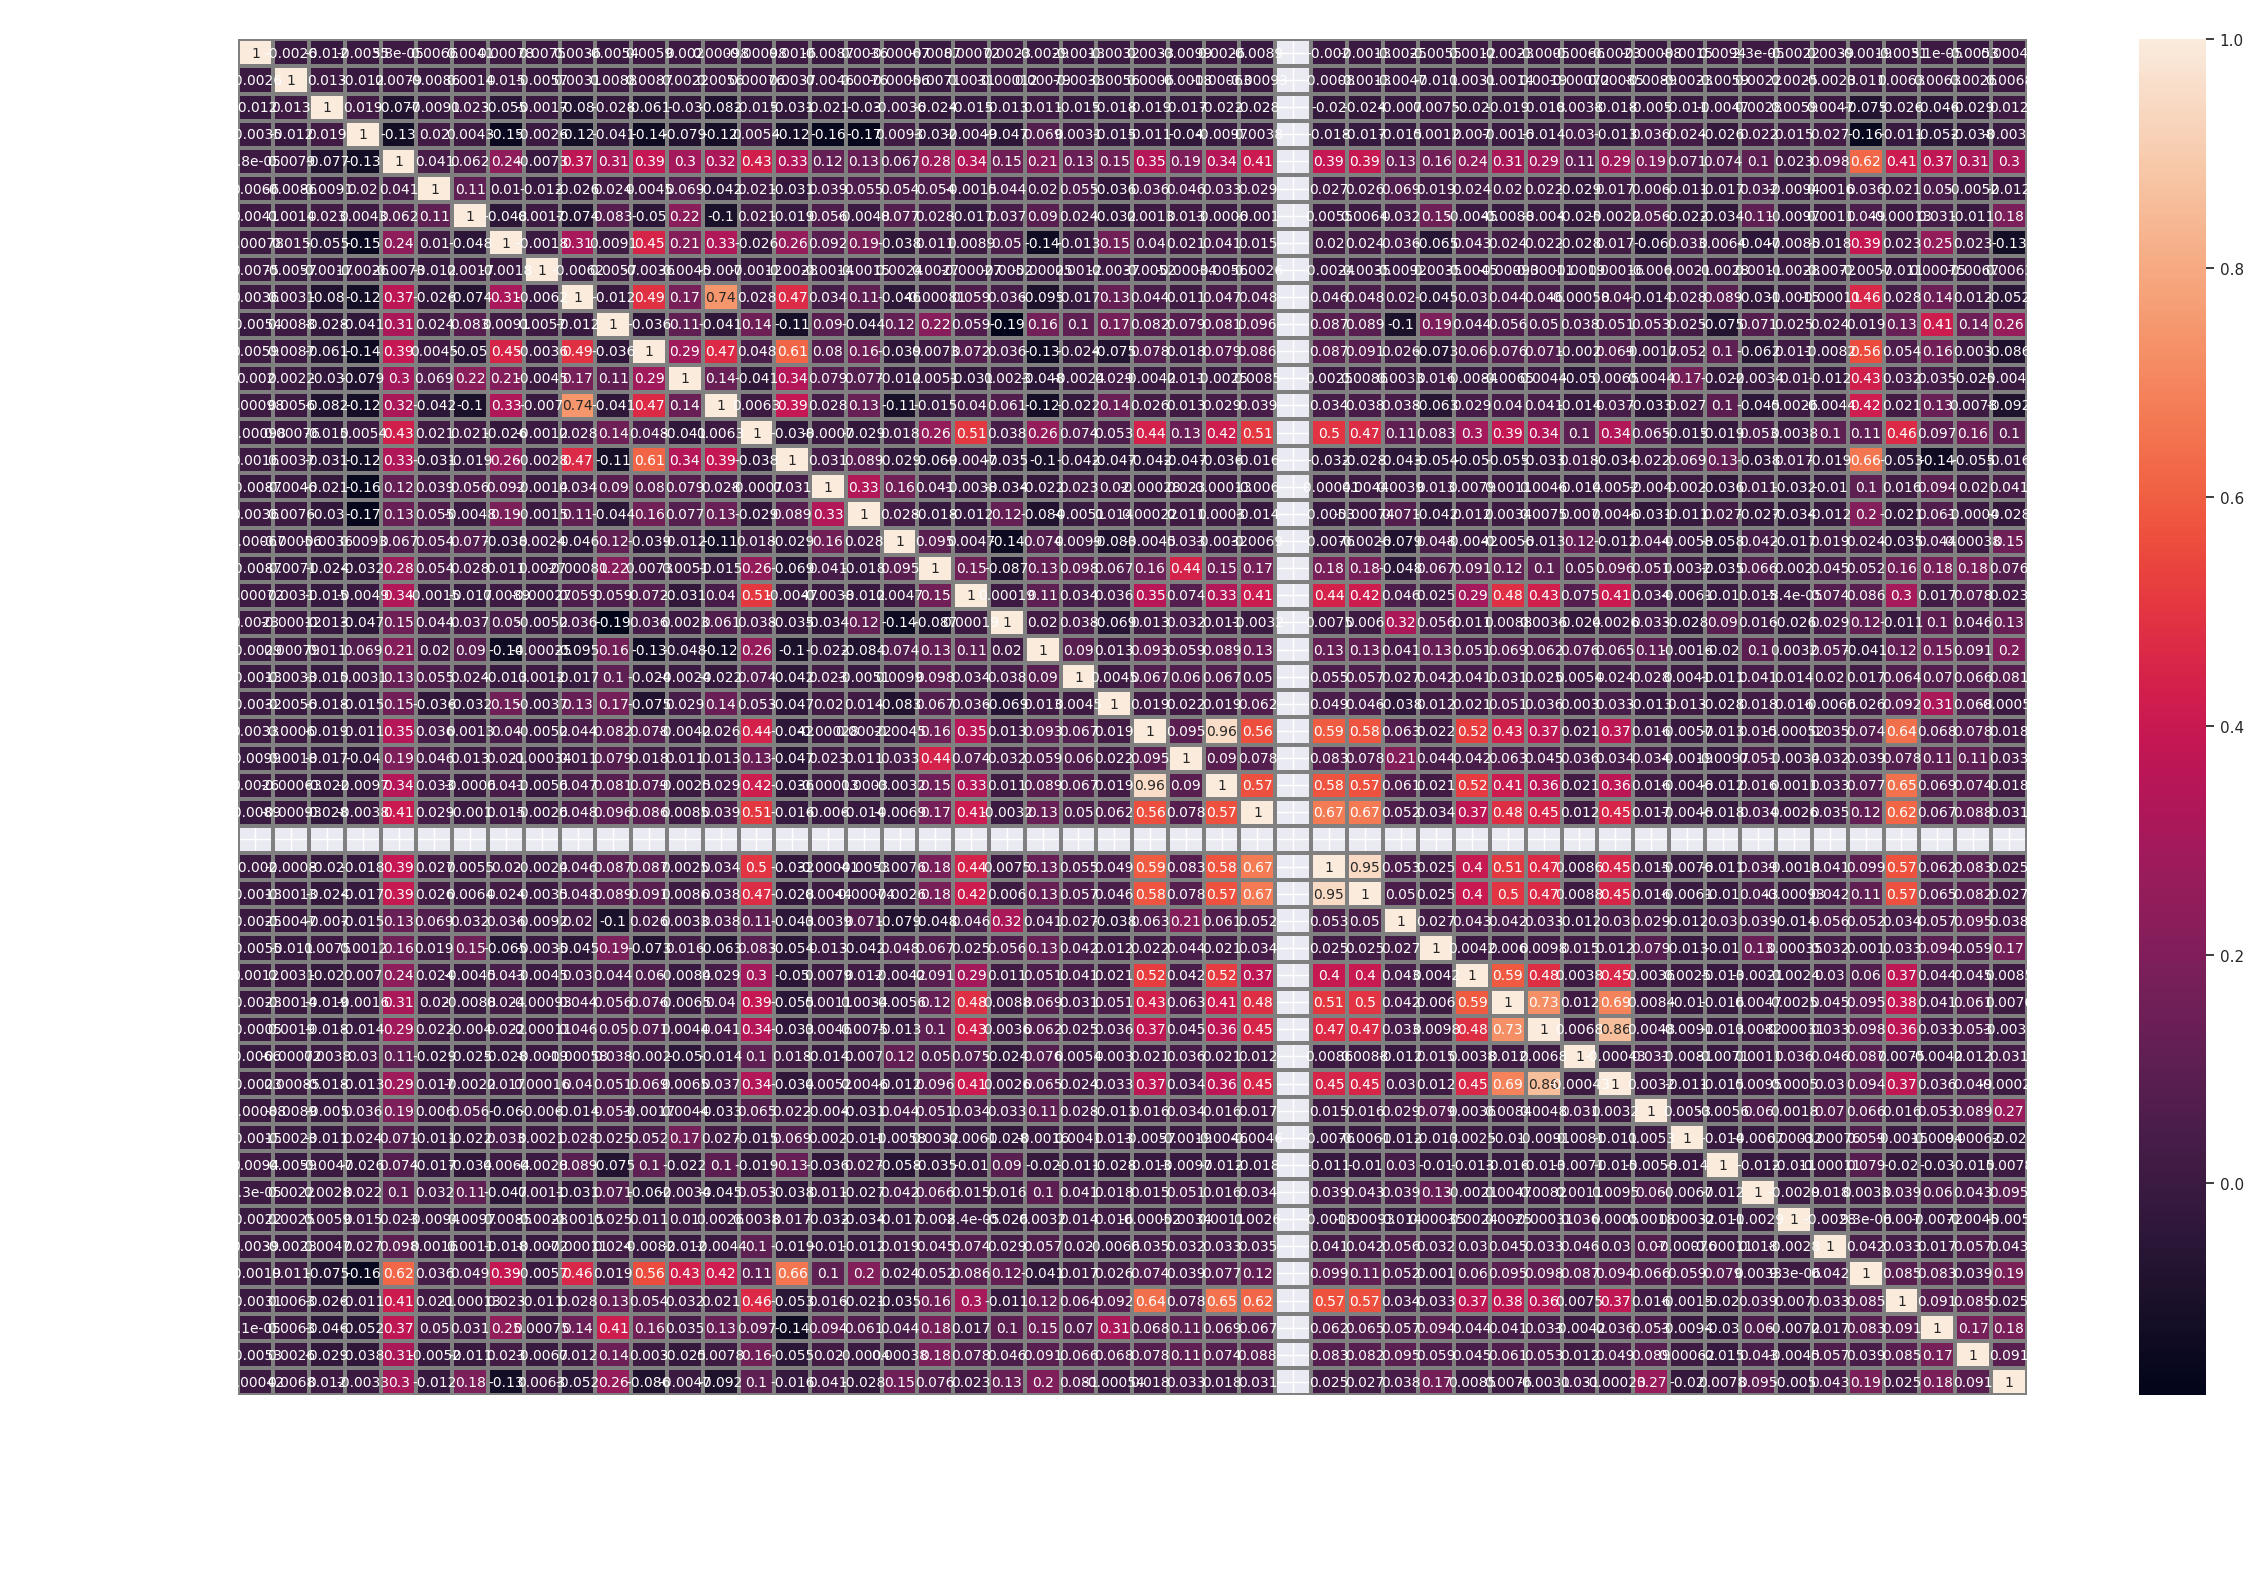

In [82]:
plt.figure(figsize=(25, 16))

# Select only numeric columns for correlation
numeric_data = fineTech_appData.select_dtypes(include=['number'])

# Draw heatmap with dark-themed color palette
sns.set_style("darkgrid")  # optional: adds grid on dark background
sns.heatmap(
    numeric_data.corr(),
    annot=True,
    linewidths=1.5,
    cmap="rocket",         # dark aesthetic
    annot_kws={"size": 10},
    linecolor='gray'
)

plt.title("🔍 Correlation Heatmap of Numeric Features", fontsize=20, color='white')
plt.xticks(rotation=45, fontsize=12, color='white')
plt.yticks(rotation=0, fontsize=12, color='white')
plt.tight_layout()
plt.show()




In [83]:
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screens_count', 'credit_screens_count', 'cc_screens_count',
       'loan_screens_count'],
      dtype='object')

In [84]:
fineTech_appData['ProfileChildren '].unique()

array([0])

In [85]:
corr_matrix = fineTech_appData.corr()
corr_matrix['ProfileChildren ']

user                      NaN
dayofweek                 NaN
hour                      NaN
age                       NaN
numscreens                NaN
minigame                  NaN
used_premium_feature      NaN
enrolled                  NaN
liked                     NaN
location                  NaN
Institutions              NaN
VerifyPhone               NaN
BankVerification          NaN
VerifyDateOfBirth         NaN
ProfilePage               NaN
VerifyCountry             NaN
Cycle                     NaN
idscreen                  NaN
Splash                    NaN
RewardsContainer          NaN
EditProfile               NaN
Finances                  NaN
Alerts                    NaN
Leaderboard               NaN
VerifyMobile              NaN
VerifyHousing             NaN
RewardDetail              NaN
VerifyHousingAmount       NaN
ProfileMaritalStatus      NaN
ProfileChildren           NaN
ProfileEducation          NaN
ProfileEducationMajor     NaN
Rewards                   NaN
AccountView               NaN
VerifyAnnualIncome        NaN
VerifyIncomeType          NaN
ProfileJobTitle           NaN
Login                     NaN
ProfileEmploymentLength   NaN
WebView                   NaN
SecurityModal             NaN
ResendToken               NaN
TransactionList           NaN
NetworkFailure            NaN
ListPicker                NaN
remain_screen_list        NaN
saving_screens_count      NaN
credit_screens_count      NaN
cc_screens_count          NaN
loan_screens_count        NaN
Name: ProfileChildren , dtype: float64

In [86]:
fineTech_appData['ProfileChildren ']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ProfileChildren , Length: 50000, dtype: int64

# Data Preprocessing

## Split dataset in Train and Test

In [87]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled']
fineTech_appData.drop(columns = 'enrolled', inplace = True)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [89]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [90]:
# take User ID in another variable
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)



In [91]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)


Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


# Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Building

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import pickle

# Combine scaled train and test data
X_combined = np.vstack((X_train_sc, X_test_sc))
combined_labels = np.concatenate((y_train.values, y_test.values))

# ==== PCA for Dimensionality Reduction ====
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# ==== KMeans Clustering ====
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_combined)
silhouette_kmeans = silhouette_score(X_combined, kmeans_labels)
print(f"Silhouette Score (KMeans): {silhouette_kmeans:.3f}")





Silhouette Score (KMeans): 0.090


In [94]:


# ==== DBSCAN Clustering ====
dbscan = DBSCAN(eps=2.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_combined)

filtered_data = X_combined[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]
if len(set(filtered_labels)) > 1:
    silhouette_dbscan = silhouette_score(filtered_data, filtered_labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.3f}")
else:
    print("DBSCAN identified only one cluster or just noise.")





Silhouette Score (DBSCAN): 0.185


<ipython-input-95-a35852afb240>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


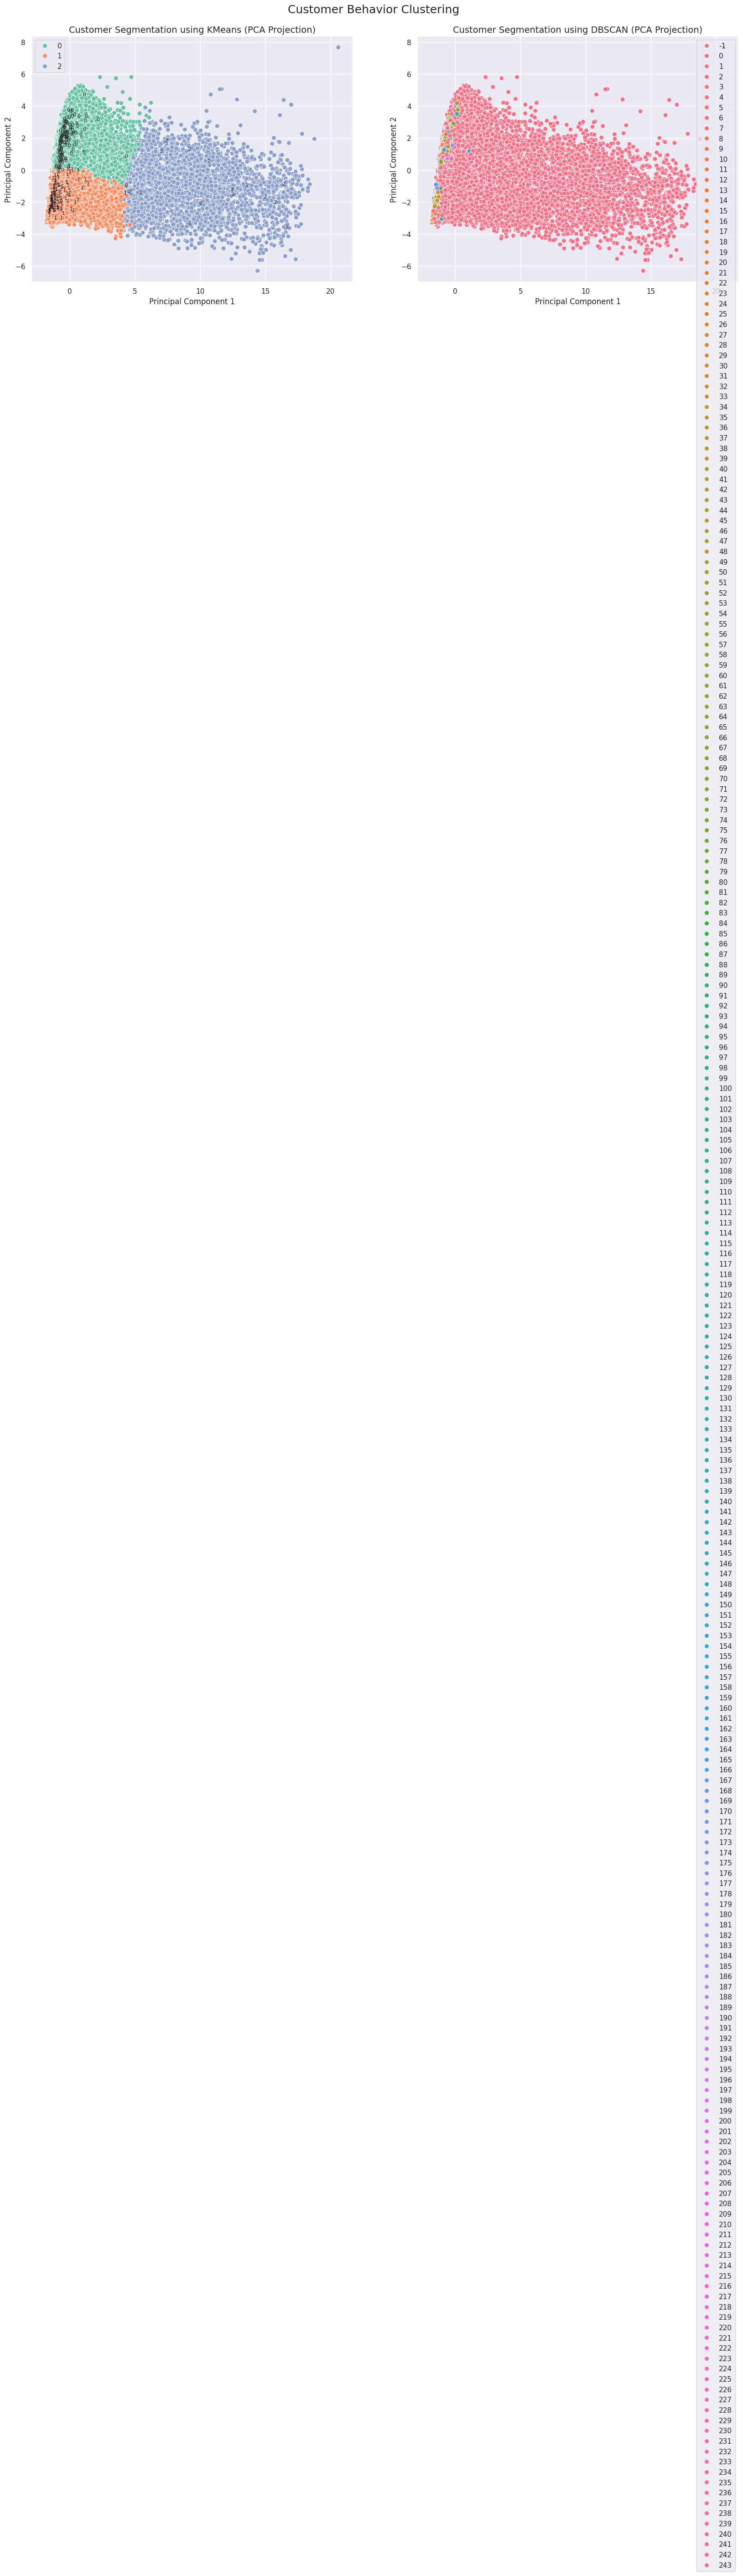

In [95]:
# ==== Visualize KMeans Results ====
plt.figure(figsize=(20 ,7))

plt.subplot(1, 2, 1)
palette = sns.color_palette("Set2", n_colors=3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette=palette, s=50)
plt.title("Customer Segmentation using KMeans (PCA Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
for i, txt in enumerate(kmeans_labels):
    if i % 200 == 0:
        plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)

# ==== Visualize DBSCAN Results ====
plt.subplot(1, 2, 2)
palette_dbscan = sns.color_palette("husl", len(set(dbscan_labels)))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette=palette_dbscan, s=50)
plt.title("Customer Segmentation using DBSCAN (PCA Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.suptitle("Customer Behavior Clustering", fontsize=18)
plt.tight_layout()
plt.show()

In [96]:
import pandas as pd

# ==== Business Insight: Identify Least Interested Cluster ====
cluster_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': kmeans_labels,
    'Enrolled': combined_labels
})

cluster_summary = cluster_df.groupby('Cluster')['Enrolled'].agg(['count', 'mean']).rename(columns={'mean': 'Enroll_Rate'})
least_engaged_cluster = cluster_summary['Enroll_Rate'].idxmin()

print("=== Cluster Engagement Summary ===")
print(cluster_summary)

print(f"\n🎯 Target Cluster for Special Offers: Cluster {least_engaged_cluster} (Lowest enrollment rate)")






=== Cluster Engagement Summary ===
         count  Enroll_Rate
Cluster                    
0        23955     0.698184
1        23183     0.279515
2         2862     0.552760

🎯 Target Cluster for Special Offers: Cluster 1 (Lowest enrollment rate)


<ipython-input-97-746f24b4dd89>:24: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


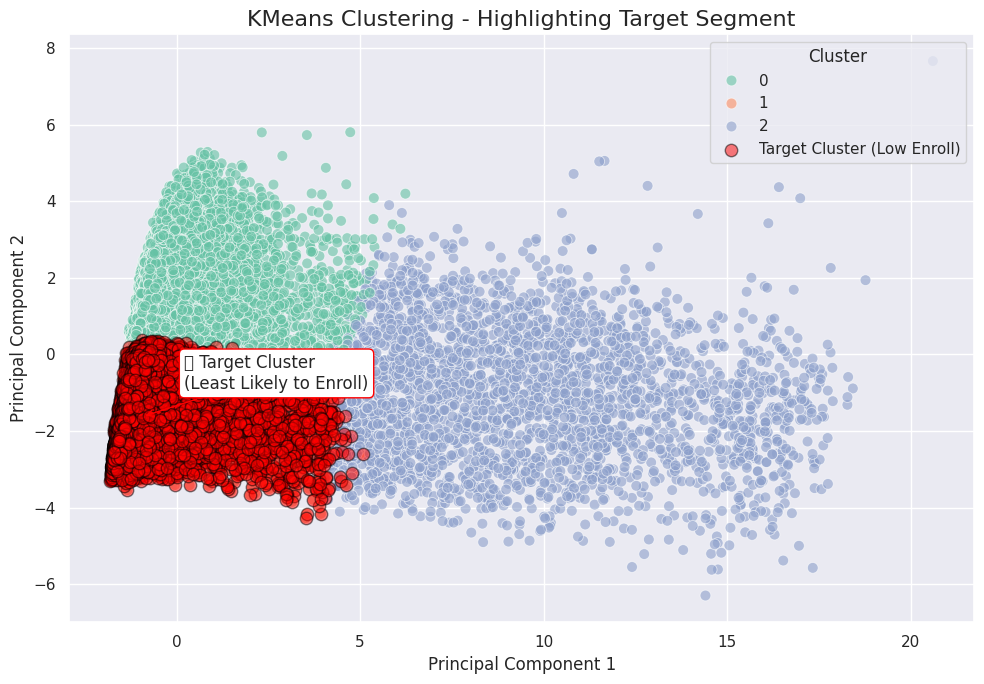

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))

# Plot all points with standard cluster coloring
sns.scatterplot(data=cluster_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60, alpha=0.6)

# Vectorized: overlay target cluster with red glow
target_cluster = cluster_df[cluster_df['Cluster'] == least_engaged_cluster]
plt.scatter(target_cluster['PC1'], target_cluster['PC2'],
            color='red', edgecolor='black', s=80, alpha=0.5, label='Target Cluster (Low Enroll)')

# Annotation pointing to cluster centroid
plt.annotate('🎯 Target Cluster\n(Least Likely to Enroll)',
             xy=(target_cluster['PC1'].mean(), target_cluster['PC2'].mean()),
             xytext=(30, 20), textcoords='offset points',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white'),
             arrowprops=dict(arrowstyle="->", color='red'))

plt.title("KMeans Clustering - Highlighting Target Segment", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()






In [98]:
# ==== Save models ====
with open("fintech_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

print("✅ Saved: 'fintech_kmeans_model.pkl', 'scaler.pkl'")

✅ Saved: 'fintech_kmeans_model.pkl', 'scaler.pkl'


# Save the Model